In [1]:
import ect
from ect.optimizers import ECTFilterTuner
import matplotlib.pyplot as plt
import numpy as np
import cv2

radius = 200
img_offset = radius/20
ect_offset = radius/10

n_knots = 20

In [2]:
def rms(x: np.ndarray) -> float:
    rms_ = np.sqrt((x*np.conj(x)).sum().sum())
    return rms_

def rmsnorm(x: np.ndarray) -> np.ndarray:
    rms = np.sqrt((x*np.conj(x)).sum().sum())
    return np.abs(x)/rms

def snr(image: cv2.Mat, template: cv2.Mat):
    snr_lin = (1/rms((rmsnorm(image) - rmsnorm(template))))
    return 20*np.log10(snr_lin)

In [3]:
opt = ECTFilterTuner(
    image_path = "../sample_imgs/white.png",
    radius = radius,
    n_knots = n_knots,
    img_offset = img_offset,
    ect_offset = ect_offset,
    loss_fcn = lambda x, y: -snr(x, y)
)

result = opt.optim()
# result = opt.optim(method = "Nelder-Mead")
# solution = result['x'][0]


Current loss=-28.441
Current loss=-28.449
Current loss=-28.717
Current loss=-28.996
Current loss=-29.037
Current loss=-29.111
Current loss=-29.219
Current loss=-29.400
Current loss=-29.488
Current loss=-29.634
Current loss=-29.829
Current loss=-30.087
Current loss=-30.371
Current loss=-30.413
Current loss=-30.419
Current loss=-30.431
Current loss=-30.452
Current loss=-30.479
Current loss=-30.491
Current loss=-30.494
Current loss=-30.499
Current loss=-30.508
Current loss=-30.520
Current loss=-30.525
Current loss=-30.530
Current loss=-30.532
Current loss=-30.534
Current loss=-30.536
Current loss=-30.538
Current loss=-30.538
Current loss=-30.539
Current loss=-30.539
Current loss=-30.540
Current loss=-30.540
Current loss=-30.540
Current loss=-30.540
Current loss=-30.540
Current loss=-30.540
Current loss=-30.540
Current loss=-30.540
Current loss=-30.540
Current loss=-30.540
Current loss=-30.540
Current loss=-30.540
Current loss=-30.540
Current loss=-30.540
Current loss=-30.540
Current loss=

In [4]:
result

      fun: -30.540286718186273
 hess_inv: array([[ 2.06905804e+01, -4.57195794e+01,  4.78152709e+00, ...,
        -1.64218950e-01,  1.59422882e-04,  3.92411084e-03],
       [-4.57195794e+01,  1.25216362e+02, -8.52463615e+00, ...,
         2.87373773e-01,  8.08270290e-03, -1.82392662e-02],
       [ 4.78152709e+00, -8.52463615e+00,  7.89293580e+00, ...,
        -4.14890783e-02,  2.14826752e-03, -1.90147287e-03],
       ...,
       [-1.64218950e-01,  2.87373773e-01, -4.14890783e-02, ...,
         1.42869887e-01,  4.46933585e-03, -1.25586635e-02],
       [ 1.59422882e-04,  8.08270290e-03,  2.14826752e-03, ...,
         4.46933585e-03,  5.43916068e-03, -6.70541868e-04],
       [ 3.92411084e-03, -1.82392662e-02, -1.90147287e-03, ...,
        -1.25586635e-02, -6.70541868e-04,  6.31316358e-03]])
      jac: array([ 1.90734863e-06,  7.15255737e-07,  1.43051147e-06,  5.48362732e-06,
       -2.38418579e-06, -2.62260437e-06,  1.66893005e-06,  9.53674316e-07,
       -2.38418579e-06, -3.09944153e-06,

opt.loss(solution)=-30.540286718186273


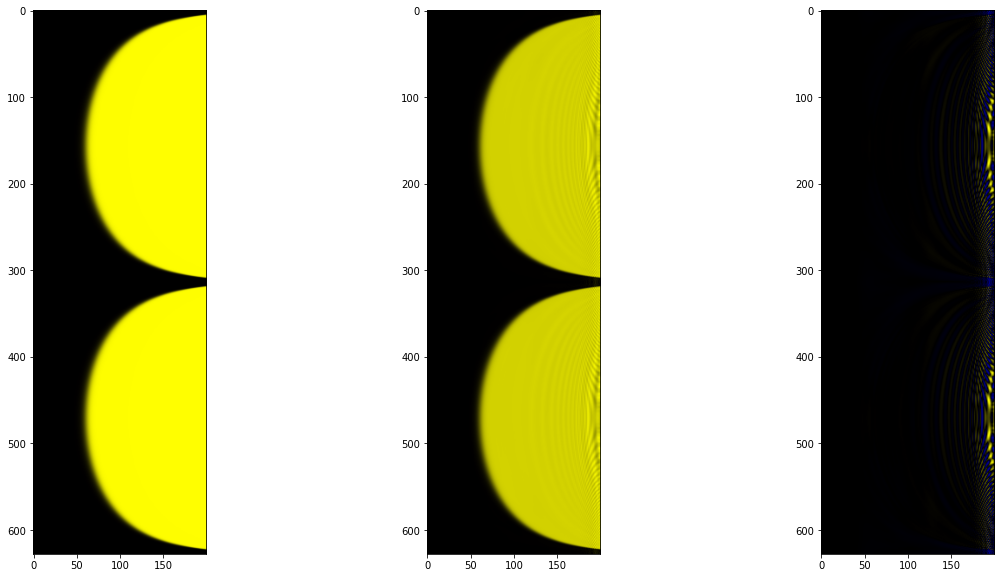

In [5]:
solution = result['x']

opt.show_result(rmsnorm)

print(f"{opt.loss(solution)=}")
# print(f"{opt.loss_sidelobe(solution)=}")

In [6]:
res = opt.inv

knots_freq = solution[:n_knots]
knots_space = solution[n_knots:2*n_knots]

fnf = ect.freqnorm(res.shape[:2], radius, knots_freq)
snf = ect.spacenorm(res.shape[:2], radius, knots_space)

print(f"{knots_freq=}")
print(f"{knots_space=}")

knots_freq=array([ 3.30231846, -2.4676382 ,  0.22325255,  0.34855757,  0.42951409,
        0.34650045,  0.42561892,  0.29941205,  0.36822618,  0.33619255,
        0.40713499,  0.34811043,  0.35251371,  0.40478174,  0.34627828,
        0.36501672,  0.34235195,  0.35890943,  0.33902837,  0.46787934])
knots_space=array([ 0.02937074, -0.01873316,  0.05058855, -0.14945052,  0.82520784,
        2.86540569,  3.36997216,  3.38840759,  3.39632183,  3.39931343,
        3.39281345,  3.38907285,  3.37732353,  3.38154925,  3.38200081,
        3.38235746,  3.38204245,  3.37758453,  3.36036744,  3.49347014])


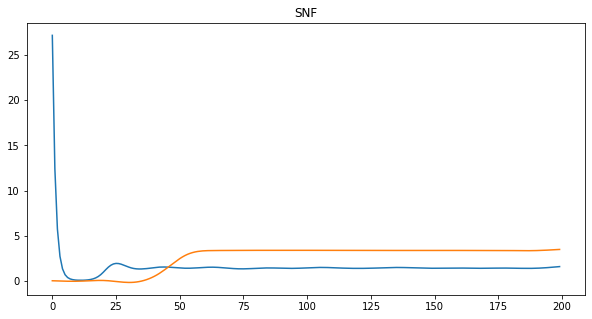

In [7]:
plt.figure(figsize=(10, 5))

# plt.subplot(1, 2, 1)
plt.title("FNF")
plt.plot(fnf[0,:])

# plt.subplot(1, 2, 2)
plt.title("SNF")
plt.plot(snf[0,:])

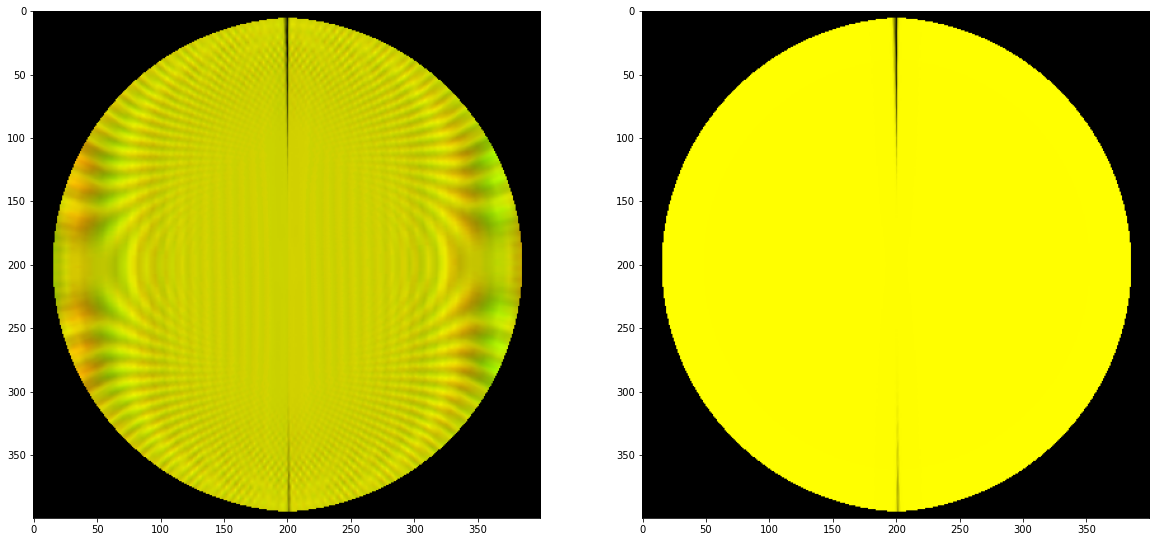

In [8]:
inv_img = ect.ilogpolar(ect.complex_to_hsv(opt.inv), radius=radius, offset=img_offset)
src_img = ect.ilogpolar(ect.complex_to_hsv(opt.image), radius=radius, offset=img_offset)

plt.figure(figsize=(20,10))

plt.subplot(1, 2, 1)
plt.imshow(inv_img)

plt.subplot(1, 2, 2)
plt.imshow(src_img)